In [1]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
acc1 = np.load("./a_curve.npy")
acc2 = np.load("./a_curve_v2.npy")

In [3]:
def means(input_array):
    # Reshape the input array into a 2D array with 200 rows and 20 columns
    reshaped_array = np.reshape(input_array, (20, 250))

    # Take the first column from each row to create a new array
    output_array = reshaped_array[:, 0]
    indices = np.linspace(0, 19, num=len(input_array))
    
    # Create a linear interpolation function
    interp_func = interp1d(np.arange(20), output_array, kind='linear')

    # Perform linear interpolation to obtain the regressed array
    regressed_array = interp_func(indices)

    return regressed_array

In [4]:
nacc1 = means(input_array=acc1)
nacc2 = means(input_array=acc2)

In [5]:
epochs = range(len(acc1))

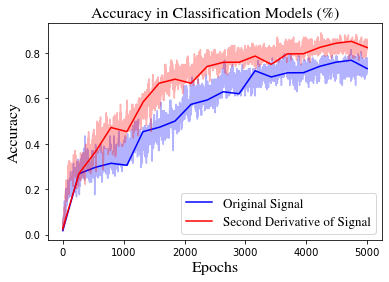

In [8]:
plt.figure()

plt.plot(epochs, acc1, 'b', alpha=0.3)
plt.plot(epochs, nacc1, 'b', label='Original Signal')
plt.plot(epochs, acc2, 'r', alpha=0.3)
plt.plot(epochs, nacc2, 'r', label='Second Derivative of Signal')
plt.xlabel("Epochs", fontdict={'family': 'STIXGeneral', 'size': 16})
plt.ylabel("Accuracy", fontdict={'family': 'STIXGeneral', 'size': 16})
plt.title('Accuracy in Classification Models (%)', fontdict={'family': 'STIXGeneral', 'size': 16})
plt.legend(prop={'family': 'STIXGeneral', 'size': 13})

plt.show()